> # 3 Classification
> Choose one of the following two datasets related to medicine:
https://archive.ics.uci.edu/ml/datasets/Parkinsons
This datasets is an example of binary classification in which the output is always in Y = {0, 1}.

>Tasks:
1. Partition the dataset into a training set and a validation set. Run a decision tree algorithm on the
training set to generate a decision tree.
2. Validate the decision tree on the validation dataset and report the total classification error (i.e. 0/1
error).
3. Run SVM to train a classifier, using a radial basis function as a kernel function.
4. Apply cross-validation to select the model parameters (box constraint C and kernel parameter γ), then
train the SVM on the entire dataset and report the total classification error.

I downloaded the file from https://archive.ics.uci.edu/ml/datasets/Parkinsons and chose dataset `parkinsons.data`

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons.data to parkinsons.data


In [99]:
import pandas as pd
data = pd.read_csv('parkinsons.data', sep=',')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


The first column contains `names`;

The 17th column contains `Y={0,1}`, where `0` for healthy and `1` for PD

*// Further details are contained in the following reference -- if you use this
dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008),
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease',
IEEE Transactions on Biomedical Engineering (to appear).*


## Attribute Information:

Matrix column entries (attributes):

`name` - ASCII subject name and recording number

`MDVP:Fo(Hz)` - Average vocal fundamental frequency

`MDVP:Fhi(Hz)` - Maximum vocal fundamental frequency

`MDVP:Flo(Hz)` - Minimum vocal fundamental frequency

`MDVP:Jitter(%)`,`MDVP:Jitter(Abs)`,`MDVP:RAP`,`MDVP:PPQ`,`Jitter:DDP` - Several
measures of variation in fundamental frequency

`MDVP:Shimmer`,`MDVP:Shimmer(dB)`,`Shimmer:APQ3`,`Shimmer:APQ5`,`MDVP:APQ`,`Shimmer:DDA - Several measures of variation in amplitude

`NHR`,`HNR` - Two measures of ratio of noise to tonal components in the voice

`status` - Health status of the subject (one) - Parkinson's, (zero) - healthy

`RPDE`,`D2` - Two nonlinear dynamical complexity measures

`DFA` - Signal fractal scaling exponent

`spread1`,`spread2`,`PPE` - Three nonlinear measures of fundamental frequency variation


In [131]:
# Preparing data for the DecisionTree and SVM
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dropping the 'name' column as it is not a feature
cut_data = data.drop(['name'], axis=1)

# Convert to float
cut_data = cut_data.astype(float)

# Separating the features and the target variable
X = cut_data.drop('status', axis=1)
y = cut_data['status']

In [137]:
# Splitting the cut_data into training and validation sets (70% train, 30% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a decision tree algorithm on the training set to generate a decision tree.
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_validation = dt_classifier.predict(X_validation)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_validation, y_pred_validation))

# Calculating the classification error
classification_error = 1 - accuracy_score(y_validation, y_pred_validation)

print("Classification Error:", classification_error)

Accuracy: 0.9322033898305084
Classification Error: 0.06779661016949157


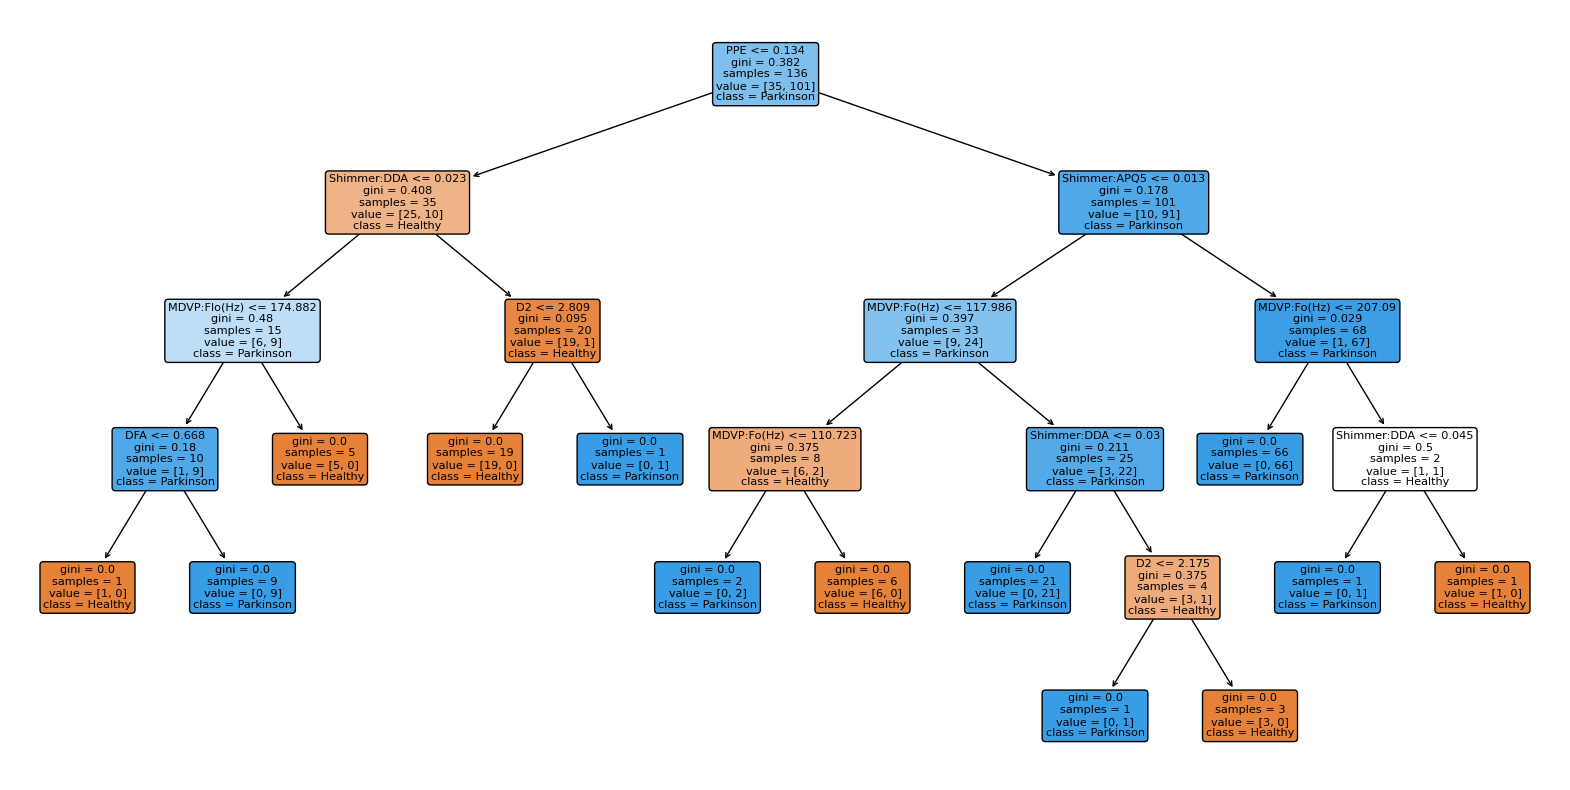

In [139]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Visualizing the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Healthy', 'Parkinson'], rounded=True)
plt.show()


> 3. Run SVM to train a classifier, using a radial basis function as a kernel function.
4. Apply cross-validation to select the model parameters (box constraint C and kernel parameter γ), then
train the SVM on the entire dataset and report the total classification error.

Firstly, lets standartize the incoming data. Support vector machine tries to maximize the distance between the separating plane and the support vectors. If one feature has very large values, it will dominate over other features when calculating the distance. Standardization gives all features the same influence on the distance metric.

In [133]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_validation = pd.DataFrame(scaler.transform(X_validation))


In [129]:

# Run SVM to train a classifier, using a radial basis function as a kernel function
# Train the Support Vector Classifier without Hyper-parameter Tuning

from sklearn import svm

svm = SVC(kernel='rbf', random_state=1, gamma=1, C=1)
svm.fit(X_train, y_train)

y_pred_validation = svm.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred_validation)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy, ", Total classification error:", 1-accuracy)

Accuracy: 0.864406779661017 , Total classification error: 0.13559322033898302


In [135]:
# (just for interest!), check the accuracy assuming the data is linear-separable
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel="linear")

clf.fit(X_train, y_train)

y_pred_test_svm_scaled = clf.predict(X_validation)

accuracy_test_svm_scaled = accuracy_score(y_validation, y_pred_test_svm_scaled)

print("SVM - assuming the data is linear-separable")
print("Test accuracy:", accuracy_test_svm_scaled)

SVM - assuming the data is linear-separable
Test accuracy: 0.847457627118644


Results of linear-SVM and rbf-SVM are very similar. It is quite difficult to undestand whether the data is linear-separable or not. Usually the rbf-SVM is used when the data is not linear.

In [96]:
# Finding best hyperparameters using loops and KFold

from sklearn.svm import SVC
from sklearn.model_selection import KFold
import numpy as np

C_values = [0.1, 1, 10, 100]
gamma_values = [1, 0.1, 0.01, 0.001]

best_score = 0
best_params = {'C': None, 'gamma': None}

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop over all possible combinations of C and gamma
for C in C_values:
    for gamma in gamma_values:
        scores = []

        # Perform manual cross-validation
        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            svm = SVC(C=C, gamma=gamma, kernel='rbf')
            svm.fit(X_train, y_train)

            # Evaluate the model on the validation set
            score = svm.score(X_val, y_val)
            scores.append(score)

        # Calculate the average score across all folds
        mean_score = np.mean(scores)

        # Update best score and parameters if current score is better
        if mean_score > best_score:
            best_score = mean_score
            best_params['C'] = C
            best_params['gamma'] = gamma

# Train the final model with the best parameters on the entire dataset
final_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel='rbf')
final_model.fit(X, y)
print("Best Parameters:", best_params, ", Best Score:", best_score)

# evaluate the classifier on the entire dataset
y_pred_entire = final_model.predict(X)

accuracy = accuracy_score(y, y_pred_entire)
print("Accuracy:", accuracy, ", Total classification error:", 1-accuracy)

Best Parameters: {'C': 100, 'gamma': 0.001} , Best Score: 0.8621052631578946
Accuracy: 0.9846153846153847 , Total classification error: 0.01538461538461533


## Results

We have trained our model on the entire dataset with the best parameters (box constraint `C = 100` and kernel parameter `gamma = 0.001`), which minimize cross-validation error.

